<a href="https://colab.research.google.com/github/KayKozaronek/03_Courses/blob/master/S%2BP_Week_1_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series

This notebook contains the code for a few scenarios in time series.

# Setup


In [0]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

Let's define a custom function to plot time series

In [0]:
def plot_series(time, series, format="",
                start =0, end =None, label =None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

# 1. Trend 

Time series can be described on the basis of 4 main features. 
1. Trend
2. Seasonality
3. Noise
4. asdf

First up we will inspect Trends


In [0]:
def trend(time, slope=0):
  return slope *time

Let's create a time series that just trends upward:

In our case we create a time series 
- over 4 years
- with a slope of 0,1

The trend is clear, our curve is going up!

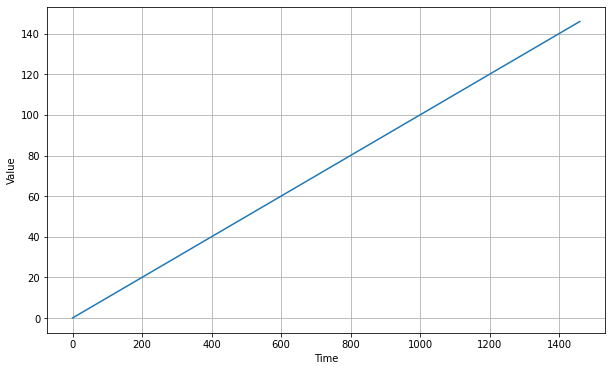

In [6]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = trend(time, 0.1)

plt.figure(figsize =(10,6))
plot_series(time, series)
plt.show()

# 2. Seasonality

Now let's generate a time series with a seasonal pattern:

In [0]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

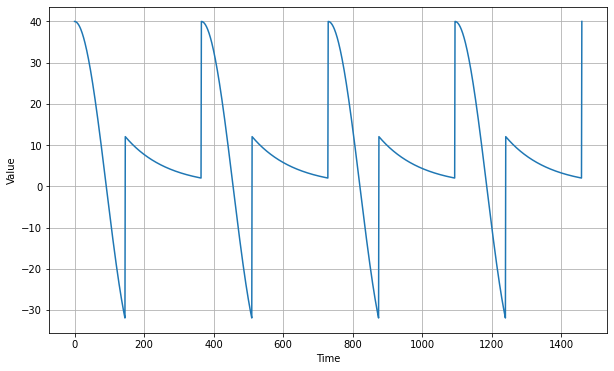

In [14]:
baseline = 10 
amplitude = 40 
series = seasonality(time, period = 365, amplitude = amplitude)

plt.figure(figsize = (10,6))
plot_series(time, series)
plt.show()

Now let's create a time series with both trend and seasonality

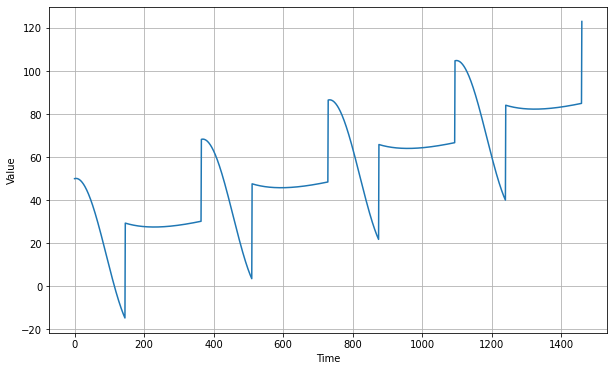

In [16]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period = 365,
                                                     amplitude =amplitude)
plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

# 3. Noise

In practice few real-life time series have such a smooth signal. They usually have some noise, and the signal-to-noise ratio can sometimes be very low. Let's generate some white noise:

In [0]:
def white_noise(time, noise_level =1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))* noise_level

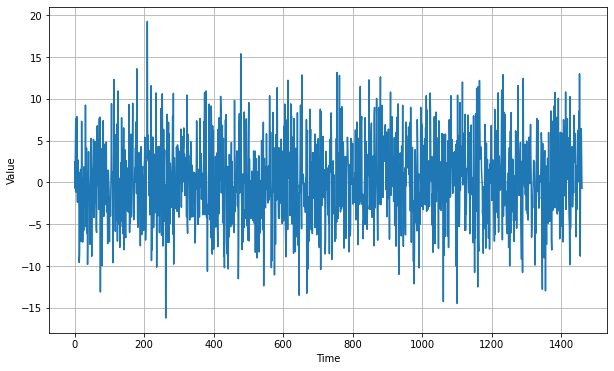

In [18]:
noise_level = 5 
noise = white_noise(time, noise_level, seed =42)

plt.figure(figsize=(10,6))
plot_series(time, noise)
plt.show()

Let's add the white noise to our time series

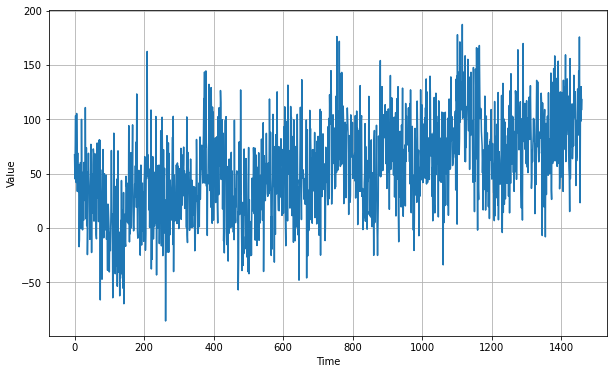

In [25]:
series += noise 

plt.figure(figsize=(10,6))
plot_series(time,series)
plt.show()

All right, this looks realistic enough for now. Let's try to forecast it. 

We will split it into two periods: 
- the training period and 
- the validation period 
- in many cases, you would also want to have a test period. 

The split will be at time step 1000.

In [0]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

# 4. Autocorrelation 
Let's explore the fourth way to describe time series

In [0]:
def autocorrelation(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  o1 = 0.5
  o2 = -0.1
  ar = rnd.randn(len(time)+50)
  ar[:50] = 100
  for step in range(50, len(time)+50):
    ar[step] += o1 * ar[step - 50]
    ar[step] += o2 * ar[step - 33]
  return ar[50:] * amplitude

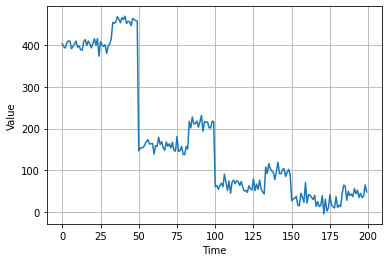

In [28]:
series = autocorrelation(time,10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

In [0]:
def autocorrelation2(time, amplitude, seed=None):
  rnd = np.random.RandomState(seed)
  o = 0.8
  ar = rnd.randn(len(time)+1)
  for step in range(1, len(time)+1):
    ar[step] += o * ar[step-1]
  return ar[1:] * amplitude

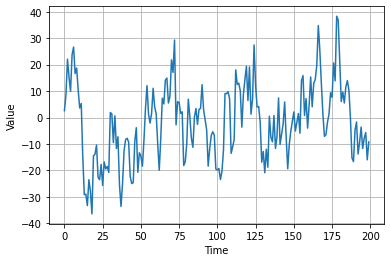

In [32]:
series = autocorrelation2(time, 10, seed=42)
plot_series(time[:200], series[:200])
plt.show()

Let's combine autocorrelation with a trend

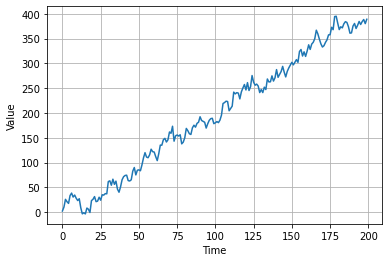

In [33]:
series = autocorrelation2(time, 10, seed=42) + trend(time,2)
plot_series(time[:200], series[:200])
plt.show()

Let's add see what happens if our series consists of autocorrelation, seasonality and a trend

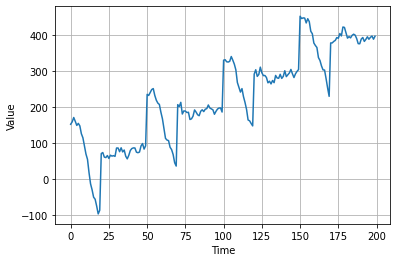

In [48]:
series = autocorrelation2(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)
plot_series(time[:200], series[:200])
plt.show()

In [0]:
series = autocorrelation(time, 10, seed=42) + seasonality(time, period = 50, amplitude=150) + trend(time,2)
series2 =autocorrelation(time, 10, seed=42) + seasonality(time, period = 50, amplitude=2) + trend(time, -1) + 550

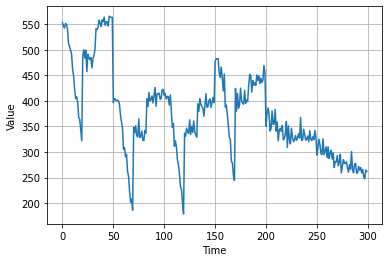

In [52]:
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

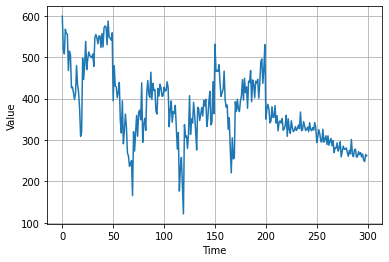

In [54]:
series += white_noise(time,30)
series[200:] = series2[200:]
plot_series(time[:300], series[:300])
plt.show()

# 5. Impulses

In [0]:
def impulses(time, num_impulses, amplitude = 1, seed = None):
  rnd = np.random.RandomState(seed)
  impulse_indices = rnd.randint(len(time), size=10)
  series = np.zeros(len(time))
  for index in impulse_indices:
    series[index] += rnd.rand()* amplitude
  return series

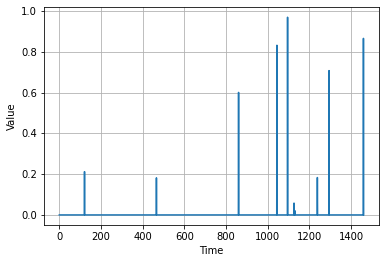

In [56]:
series = impulses(time, 10, seed=42)
plot_series(time, series)
plt.show()

In [0]:
def autocorrelation3(source, φs):
    ar = source.copy()
    max_lag = len(φs)
    for step, value in enumerate(source):
        for lag, φ in φs.items():
            if step - lag > 0:
              ar[step] += φ * ar[step - lag]
    return ar

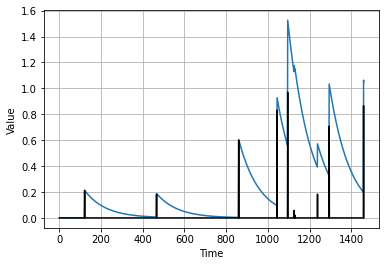

In [60]:
signal = impulses(time, 10, seed=42)
series = autocorrelation3(signal, {1: 0.99})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

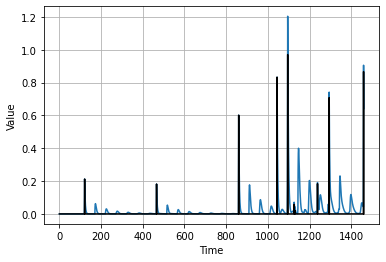

In [62]:
signal = impulses(time, 10, seed =42)
series = autocorrelation3(signal, {1: 0.70, 50:0.2})
plot_series(time, series)
plt.plot(time, signal, "k-")
plt.show()

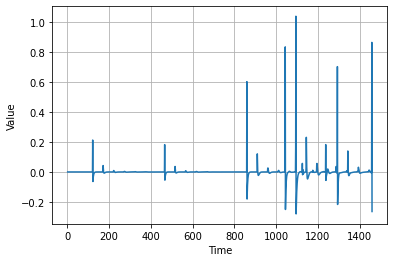

In [63]:
series_diff1 = series[1:] - series[:-1]
plot_series(time[1:], series_diff1)

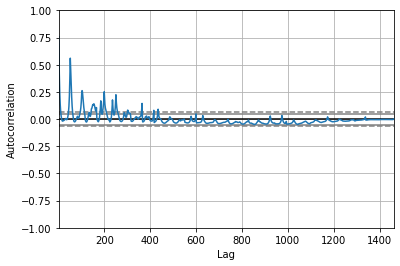

In [64]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series);

In [65]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(series, order = (5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1460
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2223.428
Method:                       css-mle   S.D. of innovations              0.053
Date:                Wed, 27 May 2020   AIC                          -4432.855
Time:                        10:30:07   BIC                          -4395.852
Sample:                             1   HQIC                         -4419.052
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.384      0.701      -0.001       0.002
ar.L1.D.y     -0.1235      0.026     -4.714      0.000      -0.175      -0.072
ar.L2.D.y     -0.1254      0.029     -4.333      0.0

In [0]:
df = pd.read_csv("sunspots.csv", parse_dates["Date"], index_col ="Date")